In [1]:
import scipy.io.wavfile
import numpy as np
from pylab import *
import cv2
from audio_utilities import *

In [2]:
import librosa

In [3]:
fs, y = scipy.io.wavfile.read("griffin_lim-master/bkvhi.wav")

In [4]:
y.shape

(145248,)

In [5]:
y = y*(1.0/32768)

In [6]:
fft_size = 2048
w = np.hanning(fft_size)
hopsamp = fft_size//8

In [7]:
full = np.array([np.fft.rfft(w*y[i:i+fft_size]) for i in range(0, len(y)-fft_size, hopsamp)])

In [8]:
mag = abs(full)**2
(mag.T**0.125).shape

(1025, 560)

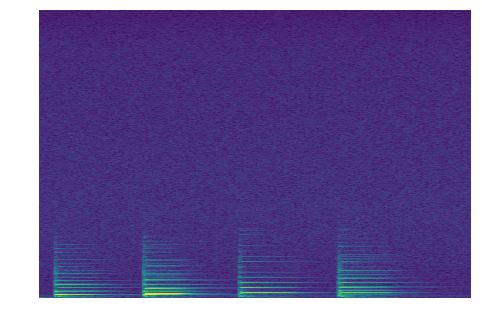

In [21]:
figure(1)
imshow(mag.T**0.125, origin='lower', aspect='auto', interpolation='nearest')
axis('off')
subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
savefig('01.png')



# CycleGAN



In [15]:
img = imread('01.png')
img.shape

(288, 432, 4)

In [17]:
X = img.mean(axis=2)
X.shape

(288, 432)

In [19]:
X.diagonal()

array([0.4627451 , 0.45784312, 0.46470588, 0.4764706 , 0.43039215,
       0.43039215, 0.45588237, 0.45980394, 0.45588237, 0.45980394,
       0.44705883, 0.47254902, 0.47058824, 0.4627451 , 0.4764706 ,
       0.4627451 , 0.47058824, 0.47254902, 0.46470588, 0.47058824,
       0.47058824, 0.47941178, 0.4745098 , 0.47941178, 0.47058824,
       0.47941178, 0.4764706 , 0.4911765 , 0.4862745 , 0.4882353 ,
       0.48333335, 0.4882353 , 0.46862745, 0.46666667, 0.4882353 ,
       0.4911765 , 0.48431373, 0.49019608, 0.4882353 , 0.4764706 ,
       0.46470588, 0.47058824, 0.4911765 , 0.47941178, 0.4745098 ,
       0.48137257, 0.47941178, 0.48333335, 0.46862745, 0.48431373,
       0.48137257, 0.4764706 , 0.4882353 , 0.4862745 , 0.4764706 ,
       0.4911765 , 0.49509805, 0.48431373, 0.48431373, 0.48431373,
       0.49019608, 0.4745098 , 0.4764706 , 0.49019608, 0.49019608,
       0.4764706 , 0.49019608, 0.4862745 , 0.46470588, 0.48137257,
       0.49509805, 0.4911765 , 0.4764706 , 0.49019608, 0.49117

In [29]:
X = X.T**8

In [30]:
def reconstruct_signal_griffin_lim(magnitude_spectrogram, fft_size, hopsamp, iterations):
    print("magnitude_spectrogram: "+str(magnitude_spectrogram.shape))
    time_slices = magnitude_spectrogram.shape[0]
    print("time_slices: "+str(time_slices))
    len_samples = int(time_slices*hopsamp + fft_size)
    print("len_samples: "+str(len_samples))

    x_reconstruct = np.random.randn(len_samples)
    print("x_reconstruct: "+str(x_reconstruct.shape))
    n = iterations # number of iterations of Griffin-Lim algorithm.
    while n > 0:
        n -= 1
        reconstruction_spectrogram = stft_for_reconstruction(x_reconstruct, fft_size, hopsamp)
        print("reconstruction_spectrogram: "+str(reconstruction_spectrogram.shape))
        reconstruction_angle = np.angle(reconstruction_spectrogram)
        print("reconstruction_angle: "+str(reconstruction_angle.shape))
        # Discard magnitude part of the reconstruction and use the supplied magnitude spectrogram instead.
        proposal_spectrogram = magnitude_spectrogram*np.exp(1.0j*reconstruction_angle)
        prev_x = x_reconstruct
        x_reconstruct = istft_for_reconstruction(proposal_spectrogram, fft_size, hopsamp)
        diff = sqrt(sum((x_reconstruct - prev_x)**2)/x_reconstruct.size)
        print('Reconstruction iteration: {}/{} RMSE: {} '.format(iterations - n, iterations, diff))
    return x_reconstruct

In [32]:
x_reconstruct = reconstruct_signal_griffin_lim(mag, fft_size, hopsamp, 300)

magnitude_spectrogram: (560, 1025)
time_slices: 560
len_samples: 145408
x_reconstruct: (145408,)
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 1/300 RMSE: 6.73472591812 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 2/300 RMSE: 2.06384293951 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 3/300 RMSE: 1.17200107943 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 4/300 RMSE: 0.879795098879 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 5/300 RMSE: 0.807282236706 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 6/300 RMSE: 0.708654640836 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 7/300 RMSE: 0.575359596682 
reconstruc

reconstruction_angle: (560, 1025)
Reconstruction iteration: 64/300 RMSE: 0.0840654702628 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 65/300 RMSE: 0.084382701128 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 66/300 RMSE: 0.0822717569264 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 67/300 RMSE: 0.0796317083992 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 68/300 RMSE: 0.0774503969521 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 69/300 RMSE: 0.0757190308271 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 70/300 RMSE: 0.0742823619834 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 71/300 RMSE: 0.0730230147207 
r

Reconstruction iteration: 128/300 RMSE: 0.0401573563534 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 129/300 RMSE: 0.0397865670845 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 130/300 RMSE: 0.0394212858131 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 131/300 RMSE: 0.0390610483024 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 132/300 RMSE: 0.0387059453548 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 133/300 RMSE: 0.0383558356924 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 134/300 RMSE: 0.0380097890168 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 135/300 RMSE: 0.0376665554249 
reconstruction_spectrogram

Reconstruction iteration: 192/300 RMSE: 0.0230218594931 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 193/300 RMSE: 0.0228466720087 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 194/300 RMSE: 0.0226482688568 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 195/300 RMSE: 0.0224304114337 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 196/300 RMSE: 0.0222092416327 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 197/300 RMSE: 0.0219980248879 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 198/300 RMSE: 0.0218013829214 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 199/300 RMSE: 0.0216198056914 
reconstruction_spectrogram

Reconstruction iteration: 256/300 RMSE: 0.0137133653844 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 257/300 RMSE: 0.0135971091119 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 258/300 RMSE: 0.013499086052 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 259/300 RMSE: 0.0134424034551 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 260/300 RMSE: 0.0134970996698 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 261/300 RMSE: 0.0136196603464 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 262/300 RMSE: 0.0135144311098 
reconstruction_spectrogram: (560, 1025)
reconstruction_angle: (560, 1025)
Reconstruction iteration: 263/300 RMSE: 0.0132823727255 
reconstruction_spectrogram:

# altro

In [165]:
import math
import sys
import numpy as np
import wave
import scipy
import scipy.signal
from pylab import *
import array
import scipy.io.wavfile

def stft_for_reconstruction(x, fft_size, hopsamp):
    window = np.hanning(fft_size)
    fft_size = int(fft_size)
    hopsamp = int(hopsamp)
    upper = len(x)-fft_size
    return np.array([np.fft.rfft(window*x[i:i+fft_size])
                     for i in range(0,upper, hopsamp)])

def get_signal(in_file, expected_fs=44100):
    fs, y = scipy.io.wavfile.read(in_file)
    num_type = y[0].dtype
    print(num_type)
    if num_type == 'int16':
        y = y*(1.0/32768)
    elif num_type == 'int32':
        y = y*(1.0/2147483648)
    elif num_type == 'float32':
        # Nothing to do
        pass
    elif num_type == 'uint8':
        raise Exception('8-bit PCM is not supported.')
    else:
        raise Exception('Unknown format.')
    if fs != expected_fs:
        raise Exception('Invalid sample rate.')
    if y.ndim == 1:
        return y
    else:
        return y.mean(axis=1)

def istft_for_reconstruction(X, fft_size, hopsamp):
    fft_size = int(fft_size)
    hopsamp = int(hopsamp)
    window = np.hanning(fft_size)
    time_slices = X.shape[0]
    len_samples = int(time_slices*hopsamp + fft_size)
    x = np.zeros(len_samples)
    for n,i in enumerate(range(0, len(x)-fft_size, hopsamp)):
        x[i:i+fft_size] += window*np.real(np.fft.irfft(X[n]))
    return x

def reconstruct_signal_griffin_lim(magnitude_spectrogram, fft_size, hopsamp, iterations):
    time_slices = magnitude_spectrogram.shape[0]
    len_samples = int(time_slices*hopsamp + fft_size)
    x_reconstruct = np.random.randn(len_samples)
    n = iterations # number of iterations of Griffin-Lim algorithm.
    while n > 0:
        n -= 1
        reconstruction_spectrogram = stft_for_reconstruction(x_reconstruct, fft_size, hopsamp)
        reconstruction_angle = np.angle(reconstruction_spectrogram)
        # proposal_spectrogram = np.dot(magnitude_spectrogram,np.exp(1.0j*reconstruction_angle))
        proposal_spectrogram = magnitude_spectrogram*np.exp(1.0j*reconstruction_angle)
        prev_x = x_reconstruct
        x_reconstruct = istft_for_reconstruction(proposal_spectrogram, fft_size, hopsamp)
        diff = sqrt(sum((x_reconstruct - prev_x)**2)/x_reconstruct.size)
        print('Reconstruction iteration: {}/{} RMSE: {} '.format(iterations - n, iterations, diff))
    return x_reconstruct

def array_to_wav(stft_modified_scaled,ITER=300,FFT_SIZE=1022, path_out = 'out.wav'):
    def save_audio_to_file(x, sample_rate, outfile='out.wav'):
        x_max = np.max(abs(x))
        assert x_max <= 1.0, 'Input audio value is out of range. Should be in the range [-1.0, 1.0].'
        x = x*32767.0
        data = array.array('h')
        for i in range(len(x)):
            cur_samp = int(round(x[i]))
            data.append(cur_samp)
        f = wave.open(outfile, 'w')
        f.setparams((1, 2, sample_rate, 0, "NONE", "Uncompressed"))
        f.writeframes(data.tostring())
        f.close()
    hopsamp = FFT_SIZE // 8
    x_reconstruct = reconstruct_signal_griffin_lim(stft_modified_scaled, FFT_SIZE, hopsamp, ITER)
    max_sample = np.max(abs(x_reconstruct))
    if max_sample > 1.0:
        x_reconstruct = x_reconstruct / max_sample
    print(x_reconstruct.shape)
    save_audio_to_file(x_reconstruct, 44100, path_out)

def wav_to_array(path_src,ITER = 300, FFT_SIZE = 1022):
    # input_signal = input_signal[:16600] #256x256
    #FFT_SIZE: 510 -> #256x256 
    hopsamp = FFT_SIZE // 8
    input_signal = get_signal(path_src, 44100)
    input_signal = input_signal[:65990]
    stft_full = stft_for_reconstruction(input_signal, FFT_SIZE, hopsamp)
    stft_mag = abs(stft_full)**2.0
    scale = 1.0 / np.amax(stft_mag)
    stft_mag *= scale
    stft_modified_scaled = stft_mag / scale
    return stft_modified_scaled**0.5


array_wav = wav_to_array('./griffin_lim-master/bkvhi.wav') # --> 512x512

#CycleGAN
inputGan = from_2D_To_3D(array_wav) #input di cyclegan
#faccio finta di generare altro cazzarola
outputGan = inputGan

#result di Gan
STICAZZI = RESHAPE(outputGan)
array_to_wav(STICAZZI,path_out = './sticazzipercoerenza.wav')

int16
Reconstruction iteration: 1/300 RMSE: 0.988599544781 
Reconstruction iteration: 2/300 RMSE: 0.0447688732325 
Reconstruction iteration: 3/300 RMSE: 0.0274558393147 
Reconstruction iteration: 4/300 RMSE: 0.0213758077459 
Reconstruction iteration: 5/300 RMSE: 0.0189953151467 
Reconstruction iteration: 6/300 RMSE: 0.0153480797347 
Reconstruction iteration: 7/300 RMSE: 0.013662754038 
Reconstruction iteration: 8/300 RMSE: 0.0130311000015 
Reconstruction iteration: 9/300 RMSE: 0.0121141124006 
Reconstruction iteration: 10/300 RMSE: 0.0112355577104 
Reconstruction iteration: 11/300 RMSE: 0.0106730033466 
Reconstruction iteration: 12/300 RMSE: 0.0103264897126 
Reconstruction iteration: 13/300 RMSE: 0.0101436929006 
Reconstruction iteration: 14/300 RMSE: 0.00969512493043 
Reconstruction iteration: 15/300 RMSE: 0.00904036135123 
Reconstruction iteration: 16/300 RMSE: 0.0085507054064 
Reconstruction iteration: 17/300 RMSE: 0.00810759750282 
Reconstruction iteration: 18/300 RMSE: 0.007572031

Reconstruction iteration: 147/300 RMSE: 0.00126081931752 
Reconstruction iteration: 148/300 RMSE: 0.00134201874376 
Reconstruction iteration: 149/300 RMSE: 0.00142832607604 
Reconstruction iteration: 150/300 RMSE: 0.00144659434821 
Reconstruction iteration: 151/300 RMSE: 0.00138841124218 
Reconstruction iteration: 152/300 RMSE: 0.00138078057522 
Reconstruction iteration: 153/300 RMSE: 0.00126638541313 
Reconstruction iteration: 154/300 RMSE: 0.00122642822707 
Reconstruction iteration: 155/300 RMSE: 0.00120860574267 
Reconstruction iteration: 156/300 RMSE: 0.00120702301406 
Reconstruction iteration: 157/300 RMSE: 0.00119701910429 
Reconstruction iteration: 158/300 RMSE: 0.00117528798736 
Reconstruction iteration: 159/300 RMSE: 0.00115323748075 
Reconstruction iteration: 160/300 RMSE: 0.00113647640784 
Reconstruction iteration: 161/300 RMSE: 0.00112430326435 
Reconstruction iteration: 162/300 RMSE: 0.00111553968201 
Reconstruction iteration: 163/300 RMSE: 0.00110970843112 
Reconstruction

Reconstruction iteration: 289/300 RMSE: 0.000710326135144 
Reconstruction iteration: 290/300 RMSE: 0.000703953533822 
Reconstruction iteration: 291/300 RMSE: 0.000697787856076 
Reconstruction iteration: 292/300 RMSE: 0.000691948277803 
Reconstruction iteration: 293/300 RMSE: 0.000686392282775 
Reconstruction iteration: 294/300 RMSE: 0.000683233705813 
Reconstruction iteration: 295/300 RMSE: 0.000676926608692 
Reconstruction iteration: 296/300 RMSE: 0.000671692479649 
Reconstruction iteration: 297/300 RMSE: 0.000756435959821 
Reconstruction iteration: 298/300 RMSE: 0.000850641342122 
Reconstruction iteration: 299/300 RMSE: 0.000682267404 
Reconstruction iteration: 300/300 RMSE: 0.000655795883026 
(66046,)


In [163]:
def from_2D_To_3D(x, dv=0):
    x = x[..., newaxis]
    x = np.tile(x, (1, 1, 3))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j,1] = dv
            x[i,j,2] = dv
    return x

In [164]:
def RESHAPE(x):
    x = np.delete(x,2,2)
    x = np.delete(x,1,2)
    x = x.reshape((512,512))
    return x